## Introduction

##### The global bike-sharing services market is predicted to expand at a compound annual growth rate of 12.5 percent from 2018 through to 2026, according to a new study (Credence Research’s Bike-Sharing Services Market report). For the details, please visit the following link: www.credenceresearch.com/press/global-bike-sharing-services-market
##### In fact, bike-sharing systems have evolved from traditional bike rentals. Unlike renting a bike from a store, at present, the bike-sharing process has become automatic. All the steps involved in the sharing process such as membership, rental and return-back can be done without contacting the owner. A user can rent a bike from a specific position and return it to any other or the same position. Not only is it convenient to rent a bike, but the bike-sharing systems have also played a very important role in traffic, environmental and health issues.
##### As the bike-sharing systems are being popular, there are different kinds of studies on the trend and various datasets have been prepared to study the bike-sharing systems. One of them is the London Bike Sharing Dataset. The source of the dataset is Kaggle. The dataset comprises of various factors that affect every hour demands of bike-sharing in London. It covers the data from April 1, 2015, to March 1, 2017. For the detail information of the dataset, please refer to part I of data manipulation.
##### The main purpose of this project is to predict future bike shares. However, apart from prediction, the dataset will be used for the applications of some attributes and methods of Pandas, sklearn and NumPy in order to meet the project requirements. In this regard, the goals of the project are set as below.


### Understanding the Columns of the Dataset

##### There are 10 columns of the dataset. They relate to the following information:
 ===========================================================================

##### 1. timestamp - is the date and time of day, used for grouping the data.
##### 2. cnt - This is the count of new bike shares.
##### 3. t1 - The real temperature in C.
##### 4. t2 - The feels like temperature in C.
##### 5. hum - The humidity as a percentage.
##### 6. wind_speed - The wind speed in km/h.
##### 7. weather_code - The category of the weather.
##### 8. is_holiday - A boolean field representing holiday (1) or non-holiday (0).
##### 9. is_weekend - A boolean field representing the weekend (1) or a weekday (0).
##### 10. season - Categorical field representing the season:
##### ============================================================================

##### Categorical fields of season relate to
    # 0 = Spring
    # 1 = Summer
    # 2 = Fall
    # 3 = Winter

##### Weather codes relate to:
    # 1 = Clear or mostly clear.
    # 2 = Scattered Clouds or Few Clouds.
    # 3 = Broken Clouds.
    # 4 = Cloudy.
    # 7 = Rain or Light Rain.
    # 10 = Rain with Thunderstorms.
    # 26 = Snowfall.
    # 94 = Freezing Fog.
##### =============================================================================

## Objectives

#### I.	To predict the future bike shares when the following features for a specific date are supplied.
#### Features to be supplied for the prediction: real temperature, feels like temperature, humidity, wind speed, weather conditions, holiday or not, weekend or not and season.
#### II.	To find the bike shares based on season, weather, hour of the day, weather conditions, and month which will be used further to conclude what features are better for bike shares.
#### III.	To find the various aggregate values of different weather conditions in London based on month, hour of the day, year, and season.
#### IV.	To find a correlation between the bike shares and relevant features, including the correlation among other features so that we can conclude how a change in one feature brings a change in another one.
#### V.	To apply various methods and attributes of Pandas, sklearn and NumPy, which are not used in the above four objectives.
#### The main libraries, which will be used to achieve the objectives are Pandas, NumPy, sklearn, matplotlib and seaborn in Jupyter Notebook. The manipulation document has been divided into the following four parts.


# Part I: Data Load, Data Info and Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import tree
from datetime import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset from the given link as a dataframe and assigning it to the variable named dataframe

In [2]:
data=pd.read_csv('Data/london_merged.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null int64
is_holiday      17414 non-null int64
is_weekend      17414 non-null int64
season          17414 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


### Shape of the dataframe

In [4]:
data.shape

(17414, 10)

### First  five rows of the data in the dataframe

In [163]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year,month,day,time
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-01-04,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-01-04,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-01-04,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015-01-04,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015-01-04,2015,1,6,4


### DF series names and index name

In [6]:
data.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [7]:
data.index

RangeIndex(start=0, stop=17414, step=1)

In [8]:
# As per the above dataset, there are 10 df series, and default index. As per the last row number 17414, the dataframe has 17414
# rows in total. Lets check the the shape of the dataframe.

In [9]:
# The shape shows that the dataframe has 17414 rows and 10 columns.

# The statistics of dataframe 

In [10]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.00000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.11887,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.09230,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,9.00000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.00000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.00000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.75000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.00000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


### Checking if any df series are null or missing values

In [11]:
data.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

In [12]:
#The above dataset shows that there is not any missing values. Data is all good for manipulation.

### Checking if any row is duplicated

In [13]:
data.duplicated().sum()

0

In [14]:
# There is no rows duplicated in the dataframe.

### Data Types of the DataFrame

In [15]:
data.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      int64
is_holiday        int64
is_weekend        int64
season            int64
dtype: object

In [16]:
#The datatypes of each df series are appropriate for statistical analysis. No data types parsing is required in this regard.

###  Adding five new columns to the dataset

In [17]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date'] = data['timestamp'].dt.date
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.weekday
data['time'] = data['timestamp'].dt.hour

### First five rows of data in dataframe after adding new columns.

### Datatypes of new columns

In [18]:
data[['date','year','month','day','time']].dtypes

date     object
year      int64
month     int64
day       int64
time      int64
dtype: object

In [19]:
# No need to parse any data type of the above DF series for the data analysis.

In [20]:
# data.set_index('timestamp', inplace=True)

In [21]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year,month,day,time
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-01-04,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-01-04,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-01-04,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015-01-04,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015-01-04,2015,1,6,4


# Part II : Data Analysis of Dataframe

### Correlation among DF series

In [22]:
# correlation=data.corr()
# f, ax = plt.subplots(figsize = (14,14))
# sns.heatmap(correlation, vmax=4, annot=True);
# data[data.columns[1:]].corr()['cnt'][:]
# data.corr(method='pearson')
corrData= data[['cnt','t1','hum','wind_speed']]
corrData.corr(method='pearson')

,cnt,t1,hum,wind_speed
cnt,1.000000,0.388798,-0.462903,0.116331
t1,0.388798,1.000000,-0.447781,0.145471
hum,-0.462903,-0.447781,1.000000,-0.287789
wind_speed,0.116331,0.145471,-0.287789,1.000000


In [23]:
# Findings : The categorival variables will be ignored for correlation analysis as they are not appropriate in this regard.

# A. Correlation of bike share numbers with other features
# ========================================================
# 1. The highest positve relationship with bike share numbers is with temperatures - both real(.39) and feels like(.37).
#    But this is weak positive relationship.
#    However,this shows that the demand of london bike share somehow fluctuates positivey based on the changes of temperature.
# 2. The highest inverse relationship wiht bike share numbers is with humidity (-.46) - but the relationship is weak inverse.
#    However, this shows that the demand of London bike share somehow fluctuates inversly based on the changes of humidity.
# 3. There is no correlation of London bike share with wind_speed.
# 4. Real temperature has strong positive realtionship with feels like temperature(.99) and week inverse relationship with 
#    humidity(-.44) and straingly no relationship with wind_speed. The correlation with the bike share numbers is shown in A.

# ==========
# Conclusion:As the correlation is not sufficient to show the influence of the features on the bike share, the average values
# ========== will be used to find what factors play more important roles than other factors to affect the london bike shares.
#            Higher the real temperature, higher the feels like temperature. It makes sense. But it's strange that the wind
#            in London has little effect on the temperature.

### Bike share number comparisons of various values of a DF series

#### 1. Bike Share number comparision based on it is weekend

Text(0.5, 1.0, 'Weekday vs Weekend Bike Shares')

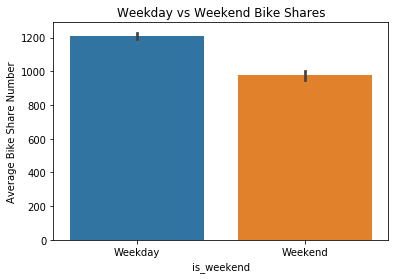

In [24]:
bsplot=sns.barplot(x=data['is_weekend'],y=data['cnt'])
bsplot.set_xticklabels(['Weekday','Weekend'])
bsplot.set_ylabel('Average Bike Share Number')
bsplot.set_title('Weekday vs Weekend Bike Shares')

In [25]:
# The weekday average bike share has more demands of bike share than that of weekend.

#### 2. Bike Share number comparision based on if it is holiday

Text(0.5, 1.0, 'Holiday vs Non-Holiday Bike Shares')

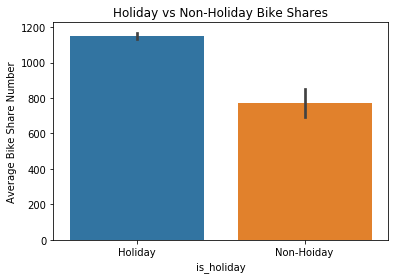

In [26]:
bsplot=sns.barplot(x=data['is_holiday'],y=data['cnt'])
bsplot.set_xticklabels(['Holiday','Non-Hoiday'])
bsplot.set_ylabel('Average Bike Share Number')
bsplot.set_title('Holiday vs Non-Holiday Bike Shares')

In [27]:
# When there is holiday, there is more average demands of bike shares than that when there is  no holiday.

#### 3. Bike Share number comparision based on season

Text(0.5, 1.0, 'Bike Shares Based on Seasons')

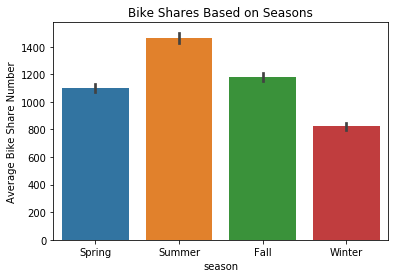

In [28]:
bsplot =sns.barplot(x=data['season'],y=data['cnt'])
bsplot.set_xticklabels(['Spring','Summer', 'Fall', 'Winter'])
bsplot.set_ylabel('Average Bike Share Number')
bsplot.set_title('Bike Shares Based on Seasons')

In [29]:
# The summer has the highest demand of bike shares while the winter has the least.In the remaining seasons, the bike shares in
# fall is higher than that of spring.

#### 4. Bike Share number comparision based on month

<Figure size 1440x936 with 0 Axes>

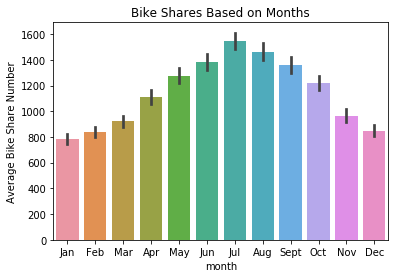

<Figure size 1440x936 with 0 Axes>

In [30]:
bsplot=sns.barplot(x=data['month'],y=data['cnt'])
bsplot.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
bsplot.set_ylabel('Average Bike Share Number')
bsplot.set_title('Bike Shares Based on Months')
plt.figure(figsize=(20,13))

In [31]:
# The highest demand of the bike shares is in July, and the least demand is in January. The demand keeps increasing from February
# to July and then it starts to decrease all the way to January.

#### 5. Bike Share number comparision based on time of the day

<Figure size 1080x576 with 0 Axes>

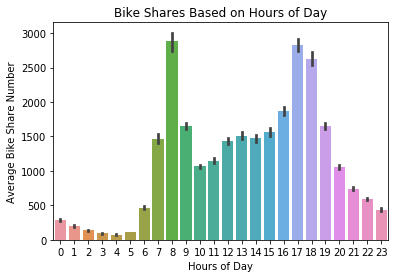

<Figure size 1080x576 with 0 Axes>

In [32]:
bsplot=sns.barplot(x=data['time'],y=data['cnt'])
bsplot.set_ylabel('Average Bike Share Number')
bsplot.set_xlabel('Hours of Day')
bsplot.set_title('Bike Shares Based on Hours of Day')
plt.figure(figsize=(15,8))

In [33]:
# The high demands of the bike shares is from 7 to 9 in the morning and the demand is high again from 4 pm to 7 pm.Likewise,
# from 12 pm to 3 pm is also fair demand of the bike shares. While the demand signficantly lowers form 8 pm to 4 am from when,
# it starts to increase again.

#### 6. Bike Share number comparision based on weather_code

<Figure size 1080x576 with 0 Axes>

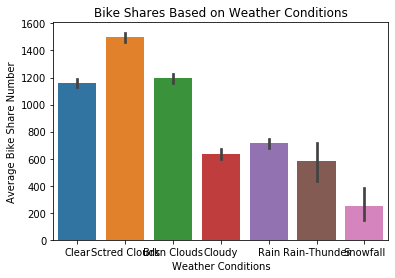

<Figure size 1080x576 with 0 Axes>

In [34]:
bsplot=sns.barplot(x=data['weather_code'],y=data['cnt'])
bsplot.set_xticklabels(['Clear','Sctred Clouds','Brkn Clouds','Cloudy','Rain','Rain-Thunder','Snowfall','Fog'])
bsplot.set_ylabel('Average Bike Share Number')
bsplot.set_xlabel('Weather Conditions')
bsplot.set_title('Bike Shares Based on Weather Conditions')
plt.figure(figsize=(15,8))

In [35]:
# There is higher average bike share demands in good weather conditions than the bad ones - highest demand when there is scattered
# clouds and lowest demand when there is snowfall. 

#### 7. Bike Share number comparision based on day of the week

<Figure size 1080x576 with 0 Axes>

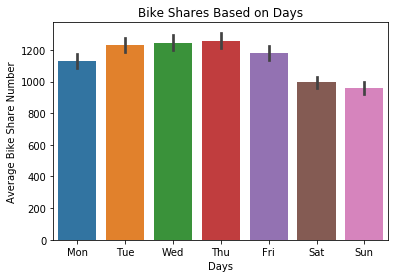

<Figure size 1080x576 with 0 Axes>

In [36]:
bsplot=sns.barplot(x=data['day'],y=data['cnt'])
bsplot.set_ylabel('Average Bike Share Number')
bsplot.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
bsplot.set_xlabel('Days')
bsplot.set_title('Bike Shares Based on Days')
plt.figure(figsize=(15,8))

In [37]:
# Highest average demands on Thursdays and lowest on Sundays.

###  Number of bike shares change throughout the day in relation to other factors in the dataset.

Text(0.5, 0, 'Hours of Day')

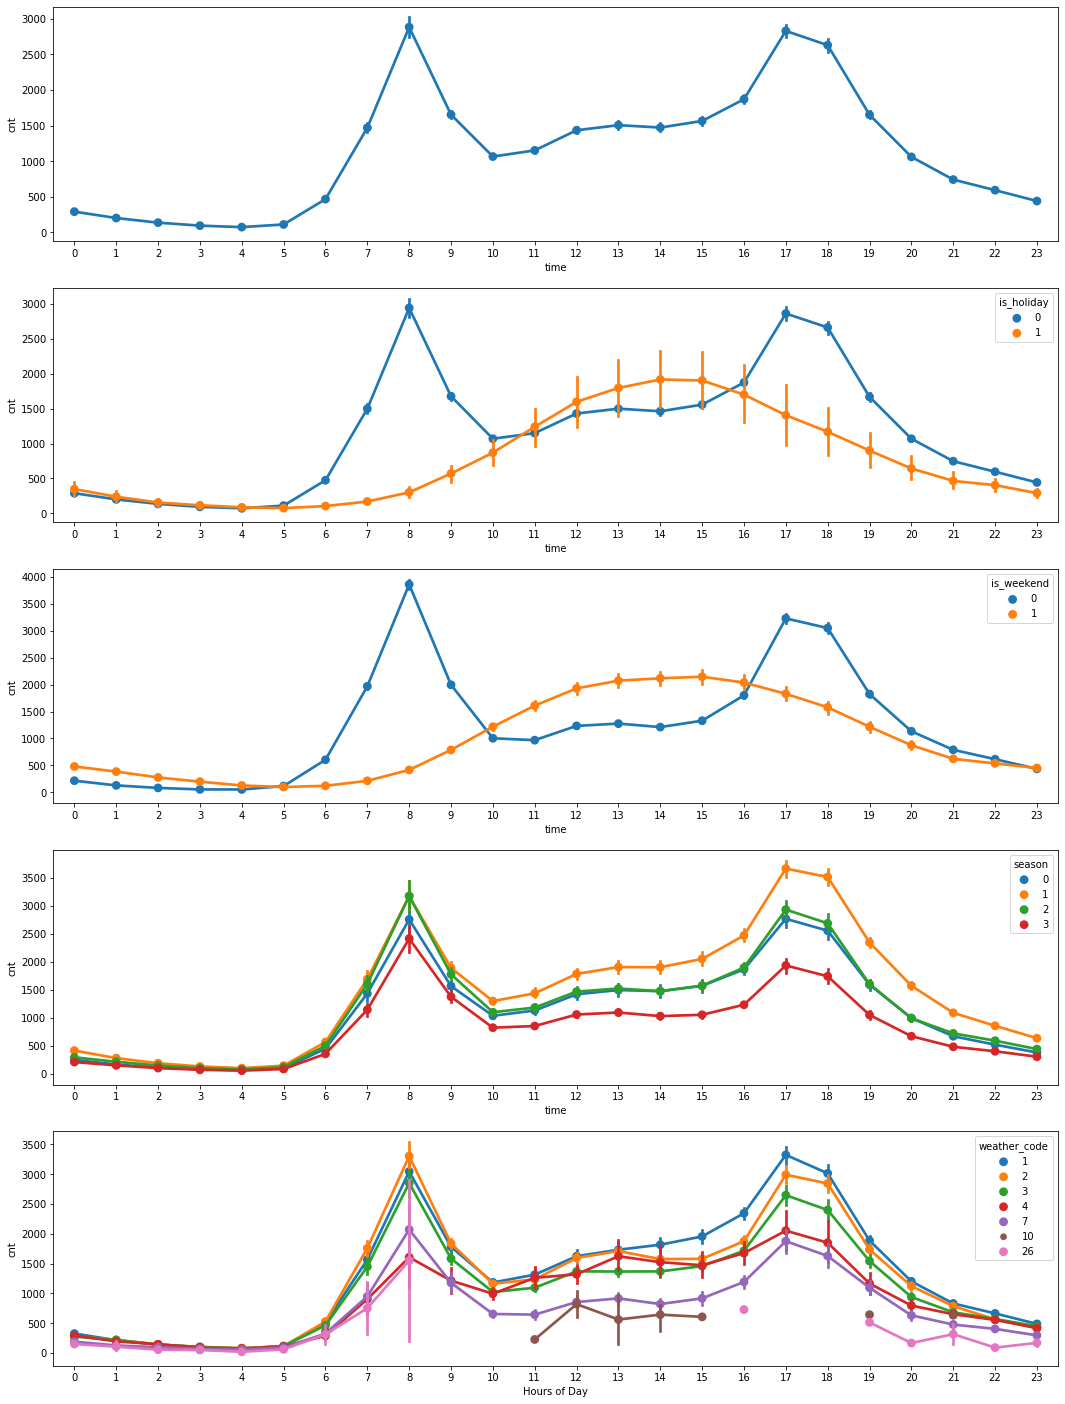

In [38]:
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

# Subplots
sns.pointplot(data=data, x='time', y='cnt', ax=ax1, xlabel='Hours of Day')
sns.pointplot(data=data, x='time', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=data, x='time', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=data, x='time', y='cnt', hue='season', ax=ax4)
sns.pointplot(data=data, x='time', y='cnt', hue='weather_code',ax=ax5)
plt.xlabel("Hours of Day")

In [39]:
# The pin point plot displays numbers of bike shares change throughout the day in relation to other factors in the dataset.

### Statistics of feels like temperature based on other DF series

#### 1. London temperature based on month

<Figure size 1080x576 with 0 Axes>

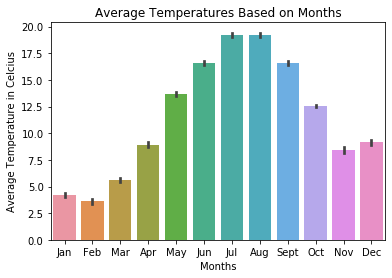

<Figure size 1080x576 with 0 Axes>

In [40]:
bsplot=sns.barplot(x=data['month'],y=data['t2'])
bsplot.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
bsplot.set_ylabel('Average Temperature in Celcius')
bsplot.set_xlabel('Months')
bsplot.set_title('Average Temperatures Based on Months')
plt.figure(figsize=(15,8))

In [41]:
# The february has the lowest average temerature and July and August have the highest average temperatures.Londons seems to be
# similar to Canada -- the start of the cold days is November and it goes to lowest in February and then starts to increase.

#### 2. London femperature based on season

Text(0.5, 1.0, 'Average Temperatures Based on Seasons')

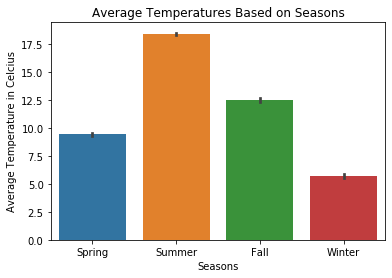

In [42]:
bsplot=sns.barplot(x=data['season'],y=data['t2'])
bsplot.set_xticklabels(['Spring','Summer','Fall','Winter'])
bsplot.set_ylabel('Average Temperature in Celcius')
bsplot.set_xlabel('Seasons')
bsplot.set_title('Average Temperatures Based on Seasons')

In [43]:
# Summer and winter temperature are as the names are. However, Fall has more hotter days than Spring does in London.

#### 3. London feels like temperature based on weather code

Text(0.5, 1.0, 'Average Temperatures Based on Weather Conditions')

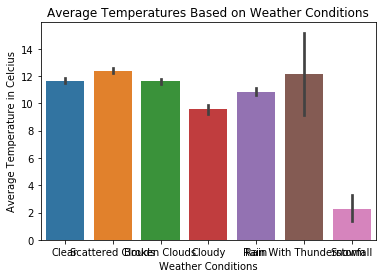

In [44]:
bsplot=sns.barplot(x=data['weather_code'],y=data['t2'])
bsplot.set_xticklabels(['Clear','Scattered Clouds','Broken Clouds','Cloudy','Rain','Rain With Thunderstorm','Snowfall','Freezing Fog'])
bsplot.set_ylabel('Average Temperature in Celcius')
bsplot.set_xlabel('Weather Conditions')
bsplot.set_title('Average Temperatures Based on Weather Conditions')

In [45]:
# The outliers of barplot shows, when there is rain and thunderstorm, and snofall, there are extreme temperatures.

#### 4. London feels like temperature based on the hour of the day

<Figure size 1080x576 with 0 Axes>

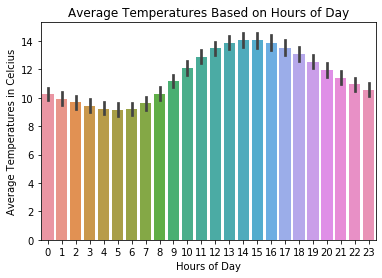

<Figure size 1080x576 with 0 Axes>

In [46]:
bsplot=sns.barplot(x=data['time'],y=data['t2'])
bsplot.set_ylabel('Average Temperatures in Celcius')
bsplot.set_xlabel('Hours of Day')
bsplot.set_title('Average Temperatures Based on Hours of Day')
plt.figure(figsize=(15,8))

In [47]:
# As usuual, the temperature is higher in the day and lower in the night time.

### Statistics of humidity based on other DF series

#### 1. London humidity based on month

<Figure size 1080x576 with 0 Axes>

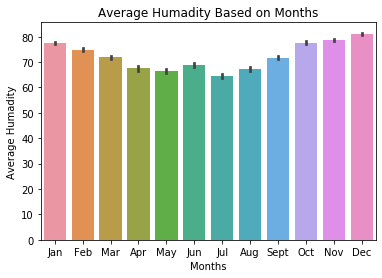

<Figure size 1080x576 with 0 Axes>

In [48]:
bsplot=sns.barplot(x=data['month'],y=data['hum'])
bsplot.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
bsplot.set_ylabel('Average Humadity')
bsplot.set_xlabel('Months')
bsplot.set_title('Average Humadity Based on Months')
plt.figure(figsize=(15,8))

In [49]:
# There is higher humadity from October ot March and lower from April to September.

#### 2. London humidity based on season

Text(0.5, 1.0, 'Average Humandity Based on Seasons')

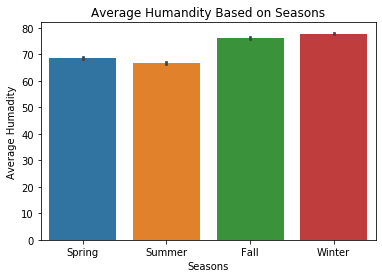

In [50]:
bsplot=sns.barplot(x=data['season'],y=data['hum'])
bsplot.set_xticklabels(['Spring','Summer','Fall','Winter'])
bsplot.set_ylabel('Average Humadity')
bsplot.set_xlabel('Seasons')
bsplot.set_title('Average Humandity Based on Seasons')

In [51]:
# Higher humidtiy level in fall and winter and lower in Spring and Summer.

#### 3. London humidity based on weather code

Text(0.5, 1.0, 'Average Humadity Based on Weather Conditions')

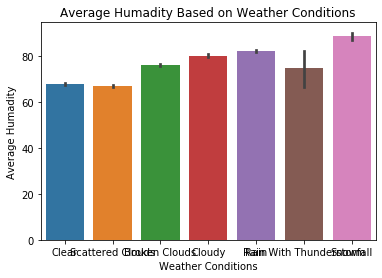

In [52]:
bsplot=sns.barplot(x=data['weather_code'],y=data['hum'])
bsplot.set_xticklabels(['Clear','Scattered Clouds','Broken Clouds','Cloudy','Rain','Rain With Thunderstorm','Snowfall','Freezing Fog'])
bsplot.set_ylabel('Average Humadity')
bsplot.set_xlabel('Weather Conditions')
bsplot.set_title('Average Humadity Based on Weather Conditions')

In [53]:
# The highest humadity in Snowfall and lowest when the weather is clear.

#### 4. London humidity based on the hour of the day

<Figure size 1080x576 with 0 Axes>

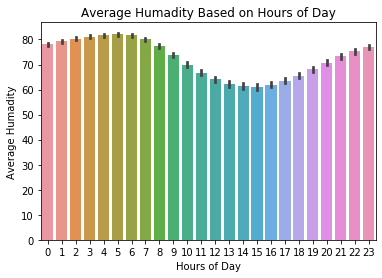

<Figure size 1080x576 with 0 Axes>

In [54]:
bsplot=sns.barplot(x=data['time'],y=data['hum'])
bsplot.set_ylabel('Average Humadity')
bsplot.set_xlabel('Hours of Day')
bsplot.set_title('Average Humadity Based on Hours of Day')
plt.figure(figsize=(15,8))

In [55]:
# Higher humadity in the night time and lower humadity in the day time.

### Statistics of wind speed based on other DF series

#### 1. London wind speed based on month

<Figure size 1080x576 with 0 Axes>

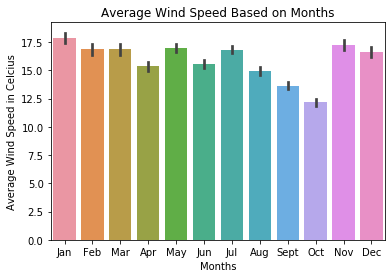

<Figure size 1080x576 with 0 Axes>

In [56]:
bsplot=sns.barplot(x=data['month'],y=data['wind_speed'])
bsplot.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
bsplot.set_ylabel('Average Wind Speed in Celcius')
bsplot.set_xlabel('Months')
bsplot.set_title('Average Wind Speed Based on Months')
plt.figure(figsize=(15,8))

In [57]:
# Highest wind speed in January and November,  and lowest windspeed in October.

#### 2. London wind speed based on season

Text(0.5, 1.0, 'Average Wind Speed Based on Seasons')

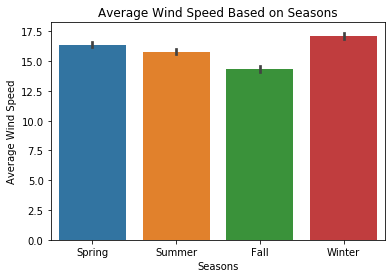

In [58]:
bsplot=sns.barplot(x=data['season'],y=data['wind_speed'])
bsplot.set_xticklabels(['Spring','Summer','Fall','Winter'])
bsplot.set_ylabel('Average Wind Speed')
bsplot.set_xlabel('Seasons')
bsplot.set_title('Average Wind Speed Based on Seasons')

#### 2. London wind speed based on weather code

In [59]:
# Winter has the highest wind speed and fall has the lowest wind speed.

Text(0.5, 1.0, 'Average Wind Speed Based on Weather Conditions')

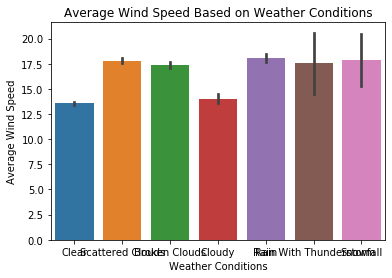

In [60]:
bsplot=sns.barplot(x=data['weather_code'],y=data['wind_speed'])
bsplot.set_xticklabels(['Clear','Scattered Clouds','Broken Clouds','Cloudy','Rain','Rain With Thunderstorm','Snowfall','Freezing Fog'])
bsplot.set_ylabel('Average Wind Speed')
bsplot.set_xlabel('Weather Conditions')
bsplot.set_title('Average Wind Speed Based on Weather Conditions')

In [61]:
# Almost same and high wind speed while there is scattered cloud, broken cloud, rain, rain with thunderstorm and snowfall, but
# lower while it clear or cloudy.

#### 4. London wind speed based on hour of the day

<Figure size 1080x576 with 0 Axes>

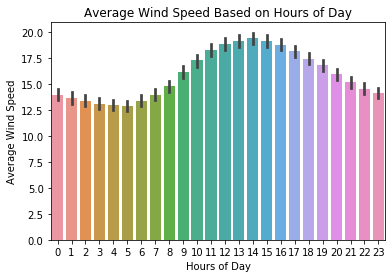

<Figure size 1080x576 with 0 Axes>

In [62]:
bsplot=sns.barplot(x=data['time'],y=data['wind_speed'])
bsplot.set_ylabel('Average Wind Speed')
bsplot.set_xlabel('Hours of Day')
bsplot.set_title('Average Wind Speed Based on Hours of Day')
plt.figure(figsize=(15,8))

In [63]:
# Higher wind speed in the day time while lower at night.

# Temperature Statistical Analysis from April 1, 2015 to March 1, 2017

In [64]:
temp = np.array(data['t1'])
print(temp)

[3.  3.  2.5 ... 5.5 5.5 5. ]


In [65]:
print("Average            : ", temp.mean())
print("Standard Deviation : ", temp.std())
print("Minimum temperature: ", temp.min())
print("Maximum temperature: ", temp.max())

Average            :  12.468090808161824
Standard Deviation :  5.571657579644049
Minimum temperature:  -1.5
Maximum temperature:  34.0


In [66]:
# Here we have some statistics about the London temperature from April 1, 2015 to March 1, 2017.
# We see that the minimum temperature over the period was -1.5 degree celcius, the maximum was 34. 
# and an average temperature of 12.5 degree celsius

# By Month Temperature Min, Max and Mean

In [67]:
data.groupby('month').t1.agg(['min', 'max', 'mean'])

,min,max,mean
month,,,
1,-1.5,15.5,6.657364
2,-1.0,15.0,6.193525
3,0.5,16.0,7.791213
4,3.0,25.0,10.206885
5,5.0,26.0,13.947917
6,9.0,29.0,16.704641
7,11.0,34.0,19.293720
8,12.5,32.5,19.224730
9,8.5,33.0,16.631277


# Bike Share Statistical Analysis from April 1, 2015 to March 1, 2017

In [68]:
share = np.array(data['cnt'])

In [69]:
print("Average            : ", share.mean())
print("Standard Deviation : ", share.std())
print("Minimum share      : ", share.min())
print("Maximum share      : ", share.max())

Average            :  1143.1188698748133
Standard Deviation :  1085.0611437917164
Minimum share      :  9
Maximum share      :  7860


In [70]:
# We also have some statistics on shared bicycles for the above period.
# The maximum number of shared bicycles was 7860 and an average of 1143.
# As the standard deviation is really large 1085. There are many outliers, which should be removed from the dataset to get a
# representative average value.

# Total Bike Shares from April 1, 2015 to March 1, 2017

In [71]:
data['cnt'].sum()

19906272

In [72]:
# We have important information. The total shared bicycles for the period were 19,905,972

# The frequency of the bike shares vs. temperature.

In [73]:
tempShare= data.groupby('t1').cnt.sum()

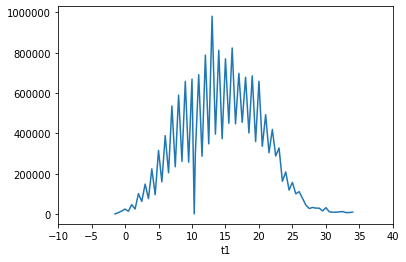

In [74]:
%matplotlib inline
tempShare.plot(kind = 'line', x='Temp', y='share', xticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])

In [75]:
# Low and high temperatures have a minimum frequency; otherwise, 
# the temperature around 13 degrees reaches the maximum frequency of the shared bicycles (near one million).

# The total, max and mean numbers of bike share  by month

### A. Total Numbers

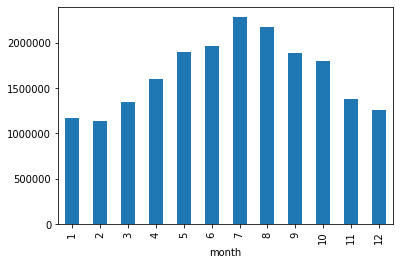

In [76]:
%matplotlib inline
share_sum = data.groupby('month').cnt.sum()
share_sum.plot(kind='bar')

In [77]:
# Sum of bicycles shared for months.
# We see that in the months of July and August there are more shared bicycles with a value greater than 2 million units

### B. Max Numbers in Each Month

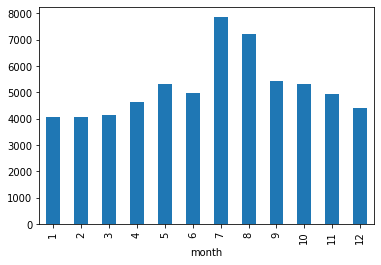

In [78]:
share_sum = data.groupby('month').cnt.max()
share_sum.plot(kind='bar')

In [79]:
# The month where more bicycles were shared was the month of July with a value close to 8000 units
# followed by the month of August

### C. Average Numbers in Each Month

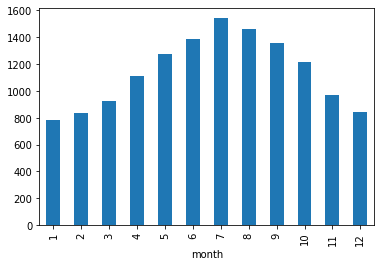

In [80]:
share_sum = data.groupby('month').cnt.mean()
share_sum.plot(kind='bar')

In [81]:
# The month of July also corresponds with the average higher of shared units

# The behavior of shared bicycles at temperatures below 5 degrees in relation to the general average

#### The overall average of the bike share for the period

In [82]:
share_mean = data['cnt'].mean()
share_mean

1143.1188698748133

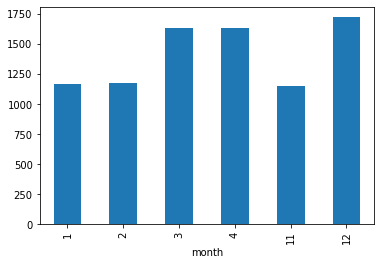

In [83]:
sharing_in_winter = data[(data['t1']<=5) & (data['cnt']>share_mean)]
graph = sharing_in_winter.groupby('month').cnt.min()
graph.plot(kind= 'bar')

In [84]:
# The months of March, April and December shared units above the general average
# despite the fact that the temperature was below 5 degrees.

# Comparision of Maximun Temperature of 2015, 2016, 2017 by month

In [85]:
year_2015 = data[data['year'] == 2015]
year_2016 = data[data['year'] == 2016]
year_2017 = data[data['year'] == 2017]

In [86]:
year_2015_temp_max = year_2015.groupby('month').t1.max()
year_2016_temp_max = year_2016.groupby('month').t1.max()
year_2017_temp_max = year_2017.groupby('month').t1.max()

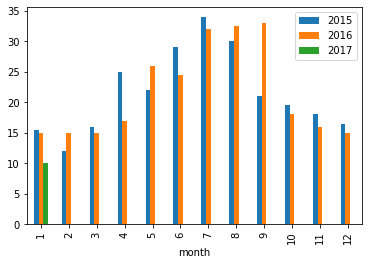

In [87]:
temp = pd.DataFrame({'2015':year_2015_temp_max, '2016':year_2016_temp_max, '2017':year_2017_temp_max})
temp.plot(kind='bar')

# Month with more bike shared

In [88]:
max_cnt = data['cnt'].max()
data[data['cnt'] == max_cnt]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year,month,day,time
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1,0,0,1,2015-07-09,2015,7,3,17


# Month with less bike shared.

In [89]:
min_cnt = data['cnt'].min()
data[data['cnt'] == min_cnt]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year,month,day,time
16361,2016-11-21 03:00:00,9,6.0,3.5,93.0,12.0,7,0,0,2,2016-11-21,2016,11,0,3


# Total Numbers of Bike Shares by Year

In [90]:
data.groupby('year').cnt.sum()

year
2015     9739046
2016    10129546
2017       37680
Name: cnt, dtype: int64

In [91]:
# 2016 was the year with more bike shared

# Part III - London Bike Share Prediction

### Train and Test Data Preparation

#### 1. Spliting dataset into two sets - train data and test data

In [92]:
predictDF = pd.read_csv('PredictData/london_merged.csv')
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(predictDF, test_size=0.2)
train = predictDF.sample(frac=.80, random_state=42)
test = predictDF.loc[~predictDF.index.isin(train.index),:]
# # data.sample(frac=.80, random_state=99).to_csv('training.csv')
# train=pd.read_csv('training.csv')
# data.loc[~data.index.isin(train.index),:].to_csv('testing.csv')
# test = pd.read_csv('testing.csv')


### Train Data

#### Train Data with all DF series

In [93]:
train.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
14097,2016-08-17 04:00:00,66,14.0,14.0,85.0,6.0,2.0,0.0,0.0,1.0
10978,2016-04-08 07:00:00,1749,7.0,6.0,87.0,7.0,3.0,0.0,0.0,0.0
7408,2015-11-10 00:00:00,172,16.0,16.0,77.0,25.0,3.0,0.0,0.0,2.0
6375,2015-09-27 15:00:00,2866,18.0,18.0,54.0,21.0,2.0,0.0,1.0,2.0
6874,2015-10-18 17:00:00,1550,13.5,13.5,77.0,14.0,7.0,0.0,1.0,2.0


#### Train Data only with feature series

In [94]:
feature_cols = ['t1','t2','hum','wind_speed','weather_code','is_holiday','is_weekend','season']
train_data = train.loc[:,feature_cols]
train_data.head()

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
14097,14.0,14.0,85.0,6.0,2.0,0.0,0.0,1.0
10978,7.0,6.0,87.0,7.0,3.0,0.0,0.0,0.0
7408,16.0,16.0,77.0,25.0,3.0,0.0,0.0,2.0
6375,18.0,18.0,54.0,21.0,2.0,0.0,1.0,2.0
6874,13.5,13.5,77.0,14.0,7.0,0.0,1.0,2.0


In [95]:
train_data.shape

(13931, 8)

### Train Target

In [96]:
train_target = train.cnt
train_target.shape

(13931,)

In [97]:
train_target.head()

14097      66
10978    1749
7408      172
6375     2866
6874     1550
Name: cnt, dtype: int64

### Test Data

#### Test Data with all DF series

In [98]:
test.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0
11,2015-01-04 11:00:00,727,2.0,-1.5,100.0,12.0,3.0,0.0,1.0,3.0
13,2015-01-04 13:00:00,916,3.0,-0.5,87.0,15.0,3.0,0.0,1.0,3.0


#### Test Data with only feature series

In [99]:
test_data = test.loc[:,feature_cols]
test_data.head()

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
7,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
9,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0
11,2.0,-1.5,100.0,12.0,3.0,0.0,1.0,3.0
13,3.0,-0.5,87.0,15.0,3.0,0.0,1.0,3.0


In [100]:
test_data.shape

(3483, 8)

### Test Target

In [101]:
test_target = test.cnt
test_target.head()

1     138
7      75
9     301
11    727
13    916
Name: cnt, dtype: int64

### Training, Testing and Predicting

In [102]:
# from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)
print(clf.predict(test_data))

[317  51 137 ...  47 529 564]


In [103]:
test_target.head()

1     138
7      75
9     301
11    727
13    916
Name: cnt, dtype: int64

In [104]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(solver='lbfgs')
# logreg.fit(train_data, train_target)

# Part IV - Using Various Methods and Attributes on DataFrame


In [105]:
# 1 Skipping a row

In [106]:
bsDataFrame=pd.read_csv("london_merged.csv")

In [107]:
bsDataFrame.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3


In [108]:
bikeData = pd.read_csv("london_merged.csv", skiprows=1)

In [109]:
bikeData.head(2)

,1/4/2015 0:00,182,3,2,93,6,3.1,0,1,3.2
0,1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
1,1/4/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3


In [113]:
# 2 Selecting a column in two different ways
df=pd.read_csv("london_merged.csv")

In [114]:
# 1.
df.cnt.head(2)

0    182
1    138
Name: cnt, dtype: int64

In [115]:
# 2.
df['cnt'].head(2)

0    182
1    138
Name: cnt, dtype: int64

In [116]:
# 3 Renaming the columns names

In [117]:
bikeData.columns =['timestamp','bike shares','real temp','feels like temp','humadity','wind_speed','weather_code','is_holiday','is_weekend','season']

In [118]:
bikeData.head(2)

,timestamp,bike shares,real temp,feels like temp,humadity,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
1,1/4/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3


In [119]:
# 4.  Assigning A Series to Index

In [120]:
bikeData.set_index('timestamp', inplace=True)

In [121]:
bikeData.head(2)

,bike shares,real temp,feels like temp,humadity,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
1/4/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3


In [122]:
# 5. Deleting index name

In [123]:
bikeData.index.name=None 

In [124]:
bikeData.head(2)

,bike shares,real temp,feels like temp,humadity,wind_speed,weather_code,is_holiday,is_weekend,season
1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
1/4/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3


In [125]:
# 6. Resetting index back to default

In [126]:
bikeData.index.name='timestamp'

In [127]:
bikeData.head(2)

,bike shares,real temp,feels like temp,humadity,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
1/4/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3


In [128]:
bikeData.reset_index(inplace=True)
bikeData.head(2)

,timestamp,bike shares,real temp,feels like temp,humadity,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
1,1/4/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3


##### Selecting Rows and Columns By laberl

In [129]:
# I. Second row and all columns
bikeData.loc[1,:]

timestamp          1/4/2015 2:00
bike shares                  134
real temp                    2.5
feels like temp              2.5
humadity                    96.5
wind_speed                     0
weather_code                   1
is_holiday                     0
is_weekend                     1
season                         3
Name: 1, dtype: object

In [130]:
# First to 3rd rows and bike share columns
bikeData.loc[0:2,'bike shares']

0    138
1    134
2     72
Name: bike shares, dtype: int64

In [131]:
# How many hours did each year have different weather conditions?
data.groupby(['year']).weather_code.value_counts()

year  weather_code
2015  1               3012
      2               1997
      3               1811
      7               1094
      4                692
      26                33
      10                 4
2016  1               3108
      2               2030
      3               1727
      7               1033
      4                765
      26                26
      10                10
2017  1                 30
      7                 14
      3                 13
      2                  7
      4                  7
      26                 1
Name: weather_code, dtype: int64

### Weaher_Code Index

In [132]:
# 1 = Clear or mostly clear.
# 2 = Scattered Clouds or Few Clouds.
# 3 = Broken Clouds.
# 4 = Cloudy.
# 7 = Rain or Light Rain.
# 10 = Rain with Thunderstorms.
# 26 = Snowfall.
# 94 = Freezing Fog.

In [133]:
data.groupby(['year']).weather_code.value_counts(normalize=True)

year  weather_code
2015  1               0.348490
      2               0.231054
      3               0.209534
      7               0.126576
      4               0.080065
      26              0.003818
      10              0.000463
2016  1               0.357282
      2               0.233360
      3               0.198529
      7               0.118749
      4               0.087941
      26              0.002989
      10              0.001150
2017  1               0.416667
      7               0.194444
      3               0.180556
      2               0.097222
      4               0.097222
      26              0.013889
Name: weather_code, dtype: float64

In [134]:
# Deleting a column named timestamp permamently

In [135]:
bikeData.drop('timestamp', axis=1, inplace=True)

In [136]:
bikeData.head(2)

,bike shares,real temp,feels like temp,humadity,wind_speed,weather_code,is_holiday,is_weekend,season
0,138,3.0,2.5,93.0,5.0,1,0,1,3
1,134,2.5,2.5,96.5,0.0,1,0,1,3


In [137]:
# Deleting first row permanently

In [138]:
bikeData.drop(0, axis=0, inplace=True)

In [139]:
bikeData.head(2)

,bike shares,real temp,feels like temp,humadity,wind_speed,weather_code,is_holiday,is_weekend,season
1,134,2.5,2.5,96.5,0.0,1,0,1,3
2,72,2.0,2.0,100.0,0.0,1,0,1,3


In [140]:
# Saving the dataframe as a .csv file

In [141]:
bikeData = pd.read_csv('Data/london_merged.csv')
bikeData.to_csv('data.csv')

In [142]:
newData=pd.read_csv('data.csv')
newData.drop("Unnamed: 0", axis=1, inplace=True)

In [143]:
newData.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,1/4/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,1/4/2015 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,1/4/2015 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [144]:
# Reading specific columns
someCols = pd.read_csv('data.csv', usecols=[1,2]) 

In [145]:
someCols.head(2)

,timestamp,cnt
0,1/4/2015 0:00,182
1,1/4/2015 1:00,138


In [146]:
# Reading specific rows

In [147]:
someRows = pd.read_csv('Data/london_merged.csv', nrows=3) 

In [148]:
someRows.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182,3.0,2.0,93.0,6,3,0,1,3
1,1/4/2015 1:00,138,3.0,2.5,93.0,5,1,0,1,3
2,1/4/2015 2:00,134,2.5,2.5,96.5,0,1,0,1,3


In [149]:
# Checking each column's approximate memory usage
df =  pd.read_csv('Data/london_merged.csv') 
df.memory_usage() 

Index              128
timestamp       139312
cnt             139312
t1              139312
t2              139312
hum             139312
wind_speed      139312
weather_code    139312
is_holiday      139312
is_weekend      139312
season          139312
dtype: int64

In [150]:
# Checking each column'a true memory usage
df.info(memory_usage='deep')    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null int64
is_holiday      17414 non-null int64
is_weekend      17414 non-null int64
season          17414 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.4 MB


In [151]:
# Sorting dataframe based on temperature
df.sort_values('cnt', ascending=False).head(1)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4470,7/9/2015 17:00,7860,23.0,22.0,27.0,11.0,1,0,0,1


In [152]:
df.sort_values('cnt').head(1)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
16361,11/21/2016 3:00,9,6.0,3.5,93.0,12.0,7,0,0,2


In [153]:
# Higest bike share an hour in the period was 7860 and lowest was 9.

In [154]:
# Checking data types
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      int64
is_holiday        int64
is_weekend        int64
season            int64
dtype: object

In [155]:
# checking type of dataframe
type(df)

pandas.core.frame.DataFrame

In [156]:
# Changing the datatype
df['wind_speed'].astype(int).dtype

dtype('int32')

In [157]:
# Combining two columns and making one
df['temperature'] = (df['t1']+df['t2'])/2

In [158]:
# Renaming a column
df.rename(columns={'cnt': 'bike_shares'}, inplace=True)

In [159]:
df.columns

Index(['timestamp', 'bike_shares', 't1', 't2', 'hum', 'wind_speed',
       'weather_code', 'is_holiday', 'is_weekend', 'season', 'temperature'],
      dtype='object')

In [160]:
# Finding sum of missing values
df.isnull().sum(axis=0) 

timestamp       0
bike_shares     0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
temperature     0
dtype: int64

In [161]:
# Saving dataframe as pickle
df.to_pickle('data.pkl')
dfPickle = pd.read_pickle('data.pkl')

In [162]:
dfPickle.head(2)

,timestamp,bike_shares,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,temperature
0,1/4/2015 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2.50
1,1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2.75


# Thank you!!!